# Titanic survivors analysis
Below is a brief analysis of the titanic survivor data on https://www.kaggle.com/c/titanic/data

In [1]:
import numpy as np 
import scipy as sp 
import matplotlib as mpl
import matplotlib.cm as cm 
import matplotlib.pyplot as plt
import pandas as pd 
#from pandas.tools.plotting import scatter_matrix
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.filterwarnings('ignore')
import string
import math
import sys
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import display, HTML

InteractiveShell.ast_node_interactivity = "all"

To analysis the data, the first step is to peek into overal information of the data:

1. Show the first few rows of the data, get a sense of what the data is about

2. What is the data type of each column

3. If there is any missing value


In [2]:
data_train = pd.read_csv('titanic_train.csv')
data_test = pd.read_csv('titanic_test.csv')
print('train data')
data_train.head()
print('test data')
data_test.head()

print('_'*40)
print('\nGeneral information of training set:\n')
data_train.info()
print('_'*40)
print('\nGeneral information of test set:\n')
data_test.info()

print('_'*40)
print('\nNumber of nulls in training sets:\n', data_train.isnull().sum())
print('_'*40)
print('\nNumber of nulls in test sets:\n', data_test.isnull().sum())

train data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


test data


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


________________________________________

General information of training set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
________________________________________

General information of test set:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            3

 ### Basic statistic of each column


In [3]:
data_train.describe(include='all')  # use "include='all' " to take into account the nonnumerical data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Lefebre, Master. Henry Forbes",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Overall statistic picture of Titanic passenger

1. Survivor number and percentage

<Figure size 432x288 with 0 Axes>

<BarContainer object of 1 artists>

<BarContainer object of 1 artists>

([<matplotlib.axis.XTick at 0xbf063c8>, <matplotlib.axis.XTick at 0xbeeec18>],
 <a list of 2 Text xticklabel objects>)

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Counts of Survival')

Text(0, 274.5, '549 (62%)')

Text(1, 171.0, '342 (38%)')

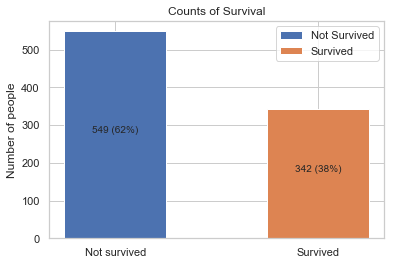

In [4]:
survive = data_train['Survived'].value_counts()

survive_percentage = survive/survive.sum()


x = data_train['Survived'].value_counts().index 

width = 0.5
plt.figure()
plt.bar (x[0], survive[0], width, label = 'Not survived' )
plt.bar (x[1], survive[1], width, label = 'Survived' )
plt.xticks(x,('Not survived','Survived'))
plt.legend(['Not Survived', 'Survived'])
plt.ylabel('Number of people')

plt.title('Counts of Survival')

for nx in x:
    plt.annotate('{} ({:.0%})'.format(survive[nx],survive_percentage[nx]),xy = (x[nx],survive[nx]/2),ha='center', va='bottom')

plt.show()



2. Gender and Pclass

In [5]:

column = 'Sex'

def cat_distr (column):
    
    data = data_train[column].value_counts()
    x = data_train[column].value_counts().index
    perc = data/data.sum()
    return [data,x,perc]

[data,x,perc] = cat_distr(column)

#data=float(data)
#(train[column]=='male')*1-0.5
#data
#x[0]
xnum = np.arange(len(x))
#xnum[0]
#perc


<Figure size 432x288 with 0 Axes>

<BarContainer object of 1 artists>

Text(0, 288.5, '577 (65%)')

<BarContainer object of 1 artists>

Text(1, 157.0, '314 (35%)')

([<matplotlib.axis.XTick at 0xbfa2240>, <matplotlib.axis.XTick at 0xbf47940>],
 <a list of 2 Text xticklabel objects>)

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Distribution of Sex')

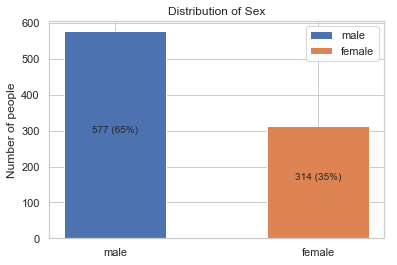

In [6]:
# draw a bar graph

width = 0.5
plt.figure()

for nx in xnum: 
    #xnum[nx]
    #x[nx]
    plt.bar (xnum[nx], data[nx], width, label = column +':'+ str(x[nx]) )
    
    plt.annotate('{} ({:.0%})'.format(data[nx],perc[nx]),xy = (xnum[nx],data[nx]/2),ha='center', va='bottom')

plt.legend(x)
plt.xticks(xnum,x)
plt.ylabel('Number of people')
plt.title('Distribution of '+ column)

plt.show()

In [7]:
column = 'Pclass'
[data,x,perc] = cat_distr(column)

#data # pay attention, data and perc are pd.series, need to use .iloc to access element by the position
#perc

#data.iloc[0]
#perc.iloc[0]

#x  # but x and xnum are numpy array, and use [location] is sufficient
xnum = np.arange(len(x))

#x[0]
#xnum[0]


<Figure size 432x288 with 0 Axes>

<BarContainer object of 1 artists>

Text(0, 245.5, '491 (55%)')

<BarContainer object of 1 artists>

Text(1, 108.0, '216 (24%)')

<BarContainer object of 1 artists>

Text(2, 92.0, '184 (21%)')

([<matplotlib.axis.XTick at 0xbff3dd8>,
 <a list of 3 Text xticklabel objects>)

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Distribution of Pclass')

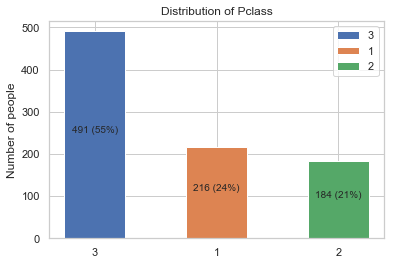

In [8]:
width = 0.5
plt.figure()

#data[1]

for nx in xnum: 
    #str(x[nx])  
    #xnum[nx]    
    #data.iloc[nx]    
    plt.bar (xnum[nx], data.iloc[nx], width, label = column +':'+str(x[nx]) )
    plt.annotate('{} ({:.0%})'.format(data.iloc[nx],perc.iloc[nx]),xy = (xnum[nx],data.iloc[nx]/2),ha='center', va='bottom')

    
plt.legend(x)
plt.xticks(xnum,x)
plt.ylabel('Number of people')
plt.title('Distribution of '+ column)

plt.show()

3. Age group & Fair group

(array([40., 14., 15., 31., 79., 98., 85., 84., 73., 45., 35., 35., 29.,
        16., 13., 11.,  4.,  5.,  1.,  1.]),
 array([ 0.42 ,  4.399,  8.378, 12.357, 16.336, 20.315, 24.294, 28.273,
        32.252, 36.231, 40.21 , 44.189, 48.168, 52.147, 56.126, 60.105,
        64.084, 68.063, 72.042, 76.021, 80.   ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Number of People')

Text(0.5, 1.0, 'Age Distribution')

(0, 110)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  25.61646,  51.23292,  76.84938, 102.46584, 128.0823 ,
        153.69876, 179.31522, 204.93168, 230.54814, 256.1646 , 281.78106,
        307.39752, 333.01398, 358.63044, 384.2469 , 409.86336, 435.47982,
        461.09628, 486.71274, 512.3292 ]),
 <a list of 20 Patch objects>)

Text(0.5, 0, 'Fare')

Text(0, 0.5, 'Number of People')

Text(0.5, 1.0, 'Fare Distribution')

(0, 600)

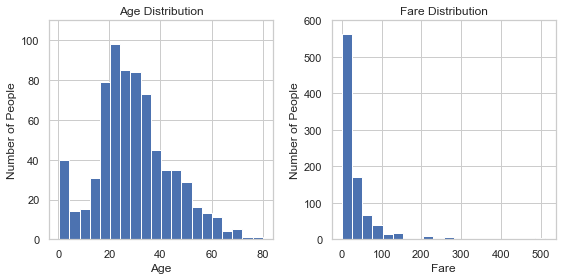

In [9]:
known_age = data_train['Age'].notnull()
age=data_train['Age']
known_age_group = age[known_age]
#known_age_group

fare = data_train['Fare']
#fare

# draw a histograme for the age distribution
n_bins = 20
fig,plots = plt.subplots (1,2,sharey = False, tight_layout = True,figsize=(8, 4)) # don't miss fig,
plots[0].hist(known_age_group,bins = n_bins)
plots[0].set_xlabel('Age')
plots[0].set_ylabel('Number of People')
plots[0].set_title('Age Distribution')
plots[0].set_ylim(0, 110)

plots[1].hist(fare,bins = n_bins)
plots[1].set_xlabel('Fare')
plots[1].set_ylabel('Number of People')
plots[1].set_title('Fare Distribution')
plots[1].set_ylim(0, 600)



# Correlation matrix of different parameters

(7, 0)

Text(0.5, 1.0, 'Correlation (all passengers)')

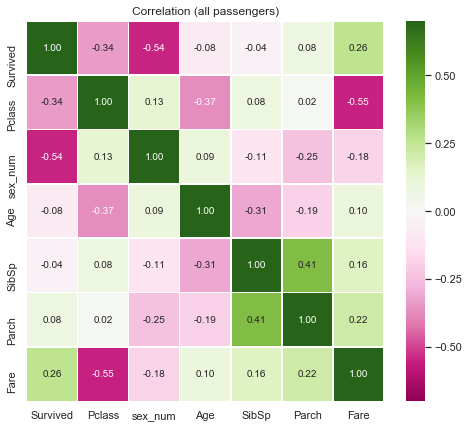

(6, 0)

Text(0.5, 1.0, 'Correlation (male passengers)')

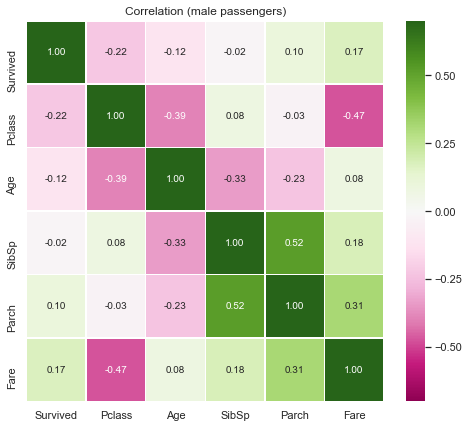

(6, 0)

Text(0.5, 1.0, 'Correlation (female passengers)')

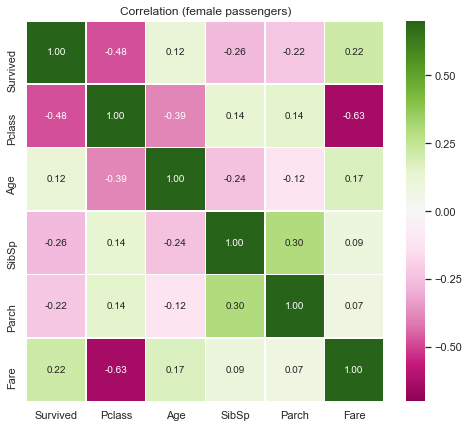

In [10]:
column = 'Sex'
data_train['sex_num']=(data_train[column]=='male')*1-0.5 # convert gender to numeric, "male"=0.5, "female" = -0.5

corr_matrix = data_train[['Survived', 'Pclass','sex_num','Age','SibSp','Parch','Fare']].corr()
#corr_matrix

corr_matrix_male = data_train[['Survived', 'Pclass','Age','SibSp','Parch','Fare']][(data_train['sex_num'] == 0.5)].corr()
#corr_matrix_male

corr_matrix_female = data_train[['Survived', 'Pclass','Age','SibSp','Parch','Fare']][(data_train['sex_num'] == -0.5)].corr()
#corr_matrix_female



fig,plots = plt.subplots(figsize=(8, 7))
sns.heatmap(corr_matrix, vmin=-0.7, vmax=0.7 ,annot=True, linewidths=0.5, fmt='.2f',cmap="PiYG")
plots.set_ylim(7, 0)
plt.title('Correlation (all passengers)')
plt.show()

fig,plots = plt.subplots(figsize=(8, 7))
sns.heatmap(corr_matrix_male, vmin=-0.7, vmax=0.7 ,annot=True, linewidths=0.5, fmt='.2f',cmap="PiYG")
plots.set_ylim(6, 0)
plt.title('Correlation (male passengers)')
plt.show()

fig,plots = plt.subplots(figsize=(8, 7))
sns.heatmap(corr_matrix_female, vmin=-0.7, vmax=0.7 ,annot=True, linewidths=0.5, fmt='.2f',cmap="PiYG")
plots.set_ylim(6, 0)
plt.title('Correlation (female passengers)')
plt.show()



It is clear that there are several factors that are obviously correleated:
1. Survival vs Gender: negative correlation, it means females have higher survival rate
2. Survival vs Pclass: negative correlation, it means first/second class passengers have higher survival rate
3. Survival vs Fare: positive correlation, it means higher fare tickets have higher survival rate

Male and female passengers show very different correlation matrix.

### 1. Survival vs Gender

In [11]:

sv_sex = data_train.groupby(['Survived'])['Sex']
sv_sex_num = sv_sex.value_counts()
xnum = data_train['Survived'].value_counts().index

sv_sex_num

xnum

# percentage of male and female survived/not survived
sv_male_perc = [sv_sex_num[0,'male'],sv_sex_num[1,'male']]/(sv_sex_num[0,'male']+sv_sex_num[1,'male'])
sv_female_perc = [sv_sex_num[0,'female'],sv_sex_num[1,'female']]/(sv_sex_num[0,'female']+sv_sex_num[1,'female'])
sv_male_perc
sv_female_perc


Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

Int64Index([0, 1], dtype='int64')

array([0.81109185, 0.18890815])

array([0.25796178, 0.74203822])

<BarContainer object of 1 artists>

Text(0, 234.0, '468\n81% of males')

<BarContainer object of 1 artists>

Text(0, 508.5, '81\n26% of females')

<BarContainer object of 1 artists>

Text(1, 54.5, '109\n19% of males')

<BarContainer object of 1 artists>

Text(1, 225.5, '233\n74% of females')

([<matplotlib.axis.XTick at 0xcd395f8>, <matplotlib.axis.XTick at 0xcd0bf28>],
 <a list of 2 Text xticklabel objects>)

Text(0, 0.5, 'Number of people')

Text(0.5, 1.0, 'Distribution of Sex')

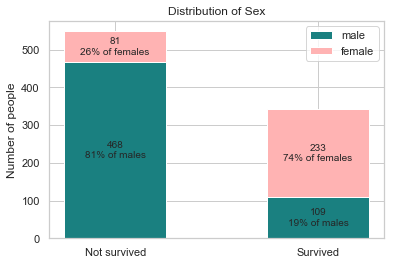

In [12]:
# draw a bar chart

width=0.5

sv_male = sv_sex_num [1,'male']
nsv_male = sv_sex_num [0,'male']
sv_female = sv_sex_num [1,'female']
nsv_female = sv_sex_num [0,'female']

for nx in xnum:
    
    
    plt.bar (xnum[nx], sv_sex_num [nx,'male'], width,color = [0.1,0.5,0.5])    
    plt.annotate('{}\n{:.0%} of males'.format(sv_sex_num [nx,'male'],sv_male_perc[nx]),xy = (xnum[nx],sv_sex_num [nx,'male']/2),ha='center', va='center')

    plt.bar (xnum[nx], sv_sex_num [nx,'female'], width, bottom=sv_sex_num [nx,'male'],color = [1,0.7,0.7])    
    plt.annotate('{}\n{:.0%} of females'.format(sv_sex_num [nx,'female'],sv_female_perc[nx]),xy = (xnum[nx],sv_sex_num [nx,'male']+sv_sex_num [nx,'female']/2),ha='center', va='center')

    
plt.legend(['male','female'])
plt.xticks(xnum,['Not survived', 'Survived'])
plt.ylabel('Number of people')
plt.title('Distribution of '+ column)

plt.show()

We can also define a function to calculate the survival rate of each group

In [13]:
def sv_rate (data):
    per = data.sum()/data.count()
    return per

sv_sex = data_train.groupby('Sex')['Survived']
sv_rate_sex = sv_sex.apply(sv_rate)
x_sex = np.arange(sv_rate_sex.count())

sv_rate_sex

sv_Pclass = data_train.groupby('Pclass')['Survived']
sv_rate_Pclass = sv_Pclass.apply(sv_rate)
x_Pclass = np.arange(sv_rate_Pclass.count())

x_Pclass
sv_rate_Pclass.iloc[0]



Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

array([0, 1, 2])

0.6296296296296297

Draw bar chart

<Figure size 432x288 with 0 Axes>

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CC17748>,
       dtype=object))

<BarContainer object of 1 artists>

Text(0, 0.37101910828025475, '74%')

<BarContainer object of 1 artists>

Text(1, 0.09445407279029462, '19%')

([<matplotlib.axis.XTick at 0xcc868d0>, <matplotlib.axis.XTick at 0xcc86198>],
 <a list of 2 Text xticklabel objects>)

Text(0.5, 0, 'Passenger Gender')

Text(0, 0.5, 'Survival Rate')

Text(0.5, 1.0, 'Survival Rate vs Gender')

<BarContainer object of 1 artists>

Text(0, 0.3148148148148148, '63%')

<BarContainer object of 1 artists>

Text(1, 0.23641304347826086, '47%')

<BarContainer object of 1 artists>

Text(2, 0.12118126272912423, '24%')

([<matplotlib.axis.XTick at 0xccc05c0>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 0, 'Passenger Class')

Text(0, 0.5, 'Survival Rate')

Text(0.5, 1.0, 'Survival Rate vs Passenger Class')

<Figure size 432x288 with 0 Axes>

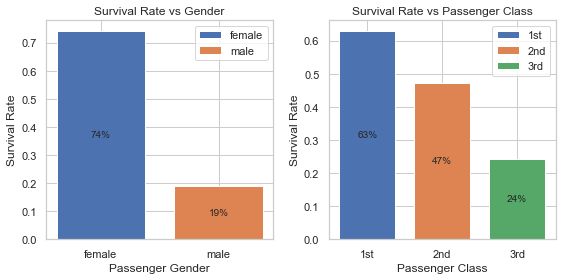

In [14]:


plt.figure()
plt.subplots (1,2,sharey = False, tight_layout = True,figsize=(8, 4)) # don't miss fig,

width = 0.75

plt.subplot(121)

for nx in x_sex:    
    plt.bar (x_sex[nx], sv_rate_sex[nx], width)   
    plt.annotate('{:.0%}'.format(sv_rate_sex [nx]),xy = (x_sex[nx],sv_rate_sex[nx]/2),ha='center', va='center')

plt.legend(['female','male'])
plt.xticks(x_sex,['female', 'male'])
plt.xlabel('Passenger Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate vs Gender')


plt.subplot(122)

for nx in x_Pclass:
    #x_Pclass[nx]
    #sv_Pclass_rate.iloc[nx]
    
    plt.bar(x_Pclass[nx], sv_rate_Pclass.iloc[nx], width)   
    plt.annotate('{:.0%}'.format(sv_rate_Pclass.iloc[nx]),xy = (x_Pclass[nx],sv_rate_Pclass.iloc[nx]/2),ha='center', va='center')
    
plt.legend(['1st','2nd','3rd'])
plt.xticks(x_Pclass,['1st','2nd','3rd'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate vs Passenger Class')


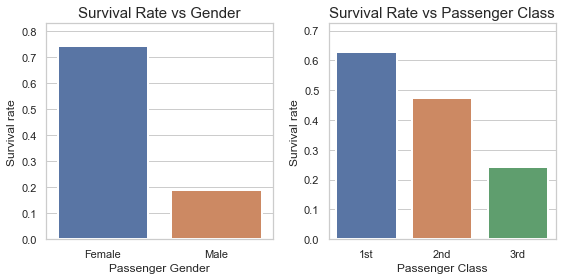

In [15]:
# Another way to plot is to use seaborn

plt.figure

plt.subplots(1,2,sharey = False, tight_layout = True,figsize=(8, 4))

plt.subplot(121)
sns.barplot(x = "sex_num", 
            y = "Survived", 
            estimator = np.mean,   # another trick to calculate the survival rate, is to use mean() function, since survived = 1, nonsurvived = 0
            data=data_train, 
            #ax = pclass_bar,
            capsize = 0,
            errwidth = 0,
            linewidth = 2 )
plt.title("Survival Rate vs Gender",fontsize = 15)
plt.xlabel("Passenger Gender", fontsize = 12);
plt.ylabel("Survival rate", fontsize = 12);
labels = ['Female', 'Male']
#val = sorted(train.Pclass.unique())
val = [0,1] ## this is just a temporary trick to get the label right. 
plt.xticks(val,labels);

plt.subplot(122)
sns.barplot(x = "Pclass", 
            y = "Survived", 
            estimator = np.mean,   # another trick to calculate the survival rate, is to use mean() function, since survived = 1, nonsurvived = 0
            data=data_train, 
            #ax = pclass_bar,
            capsize = 0,
            errwidth = 0,
            linewidth = 2 )
plt.title("Survival Rate vs Passenger Class",fontsize = 15)
plt.xlabel("Passenger Class", fontsize = 12);
plt.ylabel("Survival rate", fontsize = 12);
labels = ['1st', '2nd', '3rd']
#val = sorted(train.Pclass.unique())
val = [0,1,2] ## this is just a temporary trick to get the label right. 
plt.xticks(val,labels);

### 2. Survivale rate vs Sex and Pclass

<Figure size 432x288 with 0 Axes>

<BarContainer object of 1 artists>

Text(-0.15, 0.48404255319148937, '97%')

<BarContainer object of 1 artists>

Text(0.15, 0.18442622950819673, '37%')

<BarContainer object of 1 artists>

Text(0.85, 0.4605263157894737, '92%')

<BarContainer object of 1 artists>

Text(1.15, 0.0787037037037037, '16%')

<BarContainer object of 1 artists>

Text(1.85, 0.25, '50%')

<BarContainer object of 1 artists>

Text(2.15, 0.06772334293948126, '14%')

([<matplotlib.axis.XTick at 0xcc46ba8>,
 <a list of 3 Text xticklabel objects>)

Text(0.5, 0, 'Passenger Class')

Text(0, 0.5, 'Survival Rate')

Text(0.5, 1.0, 'Survival Rate vs Gender & Passenger Class ')

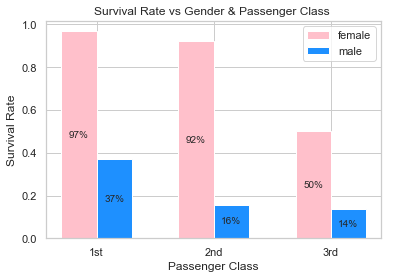

In [16]:
sv_sex_class = data_train.groupby(['Sex','Pclass'])['Survived']
#sv_sex_class.sum()


sv_rate_sex_class = sv_sex_class.apply(sv_rate)
#sv_rate_sex_class
#sv_rate_sex_class['female',1]

#sv_class_sex = train.groupby(['Pclass','Sex'])['Survived']
#sv_rate_class_sex = sv_class_sex.apply(sv_rate)
#sv_rate_class_sex

plt.figure()

width = 0.3

for nx in x_Pclass:
    #x_Pclass[nx]
    sv_fm = sv_rate_sex_class['female',nx+1]    
    plt.bar(x_Pclass[nx]-width/2, sv_fm, width, color = 'pink')   
    plt.annotate('{:.0%}'.format(sv_fm),xy = (x_Pclass[nx]-width/2,sv_fm/2),ha='center', va='center')
    
    sv_m = sv_rate_sex_class['male',nx+1]    
    plt.bar(x_Pclass[nx]+width/2, sv_m, width, color = 'dodgerblue')   
    plt.annotate('{:.0%}'.format(sv_m),xy = (x_Pclass[nx]+width/2,sv_m/2),ha='center', va='center')
    
plt.legend(['female','male'])
plt.xticks(x_Pclass,['1st','2nd','3rd'])
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate vs Gender & Passenger Class ')   

Its clear that in all passenger classes, females have a much higher survival rate.

### 3. Age distribution of survival passengers

<Figure size 432x288 with 0 Axes>

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000DE42710>,
       dtype=object))

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Distribution')

Text(0.5, 1.0, 'Distribution of Survived Passengers')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Distribution')

Text(0.5, 1.0, 'Distribution of Non-survived Passengers')

<Figure size 432x288 with 0 Axes>

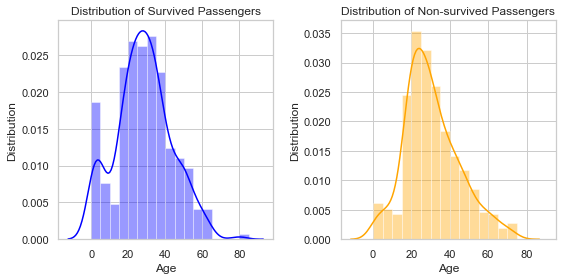

In [17]:
sv_age = data_train['Age'][(data_train['Survived']==1)& data_train['Age'].notnull()]
nsv_age = data_train['Age'][(data_train['Survived']==0)& data_train['Age'].notnull()]


n_bins = 18
plt.figure()
plt.subplots(1,2,sharey = False, tight_layout = True,figsize=(8, 4))

#ax1 = plt.subplot(1,2,1)
#plt.hist(sv_age,bins = n_bins,ax = ax1, range = (0,90))

plt.subplot(1,2,1)
sns.distplot(sv_age, kde=True, color="Blue",bins=n_bins,hist_kws={"histtype": "bar","range":(0,90)})
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Distribution of Survived Passengers')

plt.subplot(1,2,2)
sns.distplot(nsv_age, kde=True, color="Orange",bins=n_bins,hist_kws={"histtype": "bar","range":(0,90)})
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.title('Distribution of Non-survived Passengers')

The age distribution of survived and non-survived passengers are quite close.But for the survived passengers, the distribution has a clear peak at age group 0-4, this is due to the 'women and children first' policy.There are also more percentage of middle age for survived passengers, in compared to the non-survived group, which has a peak at the age group of 20-25.We shall see below that this peak is contributed by young male passengers, which takes up the largest percentage in the passengers. 

### 4. Survival rate vs Age group

 We define several age groups using the pandas function cut

pd.cut(DataFrame.Column,bins,labels,include_lowest = True)

<Figure size 432x288 with 0 Axes>

<BarContainer object of 9 artists>

Text(0.5, 0, 'Age group')

Text(0, 0.5, 'Survival rate (%)')

([<matplotlib.axis.XTick at 0xc715da0>,
 <a list of 9 Text xticklabel objects>)

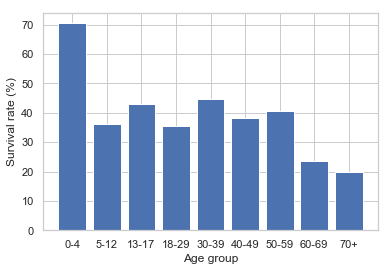

In [18]:
bins = [0,5,12,18,30,40,50,60,70,120]
labels = ['0-4','5-12','13-17','18-29','30-39','40-49','50-59','60-69','70+']
data_train['agegroup'] = pd.cut(data_train.Age,bins,labels = labels,include_lowest = True)

#train['agegroup'] 

sv_agegroup = data_train.groupby('agegroup')['Survived']
num_agegroup = sv_agegroup.count()
sv_num_agegroup = sv_agegroup.sum()
sv_rate_agegroup = sv_agegroup.mean()

xnum = np.arange(len(labels))

plt.figure()
plt.bar(xnum,sv_rate_agegroup*100)

plt.xlabel('Age group')
plt.ylabel('Survival rate (%)')
plt.xticks(xnum,['0-4','5-12','13-17','18-29','30-39','40-49','50-59','60-69','70+'])



Other combined groups (Ages,Gender) & (Ages, Pclass)

(<Figure size 792x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C457358>,
       dtype=object))

<BarContainer object of 9 artists>

<BarContainer object of 8 artists>

Text(0.5, 0, 'Age group')

Text(0, 0.5, 'Number of people')

([<matplotlib.axis.XTick at 0xc4fcb70>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'Age distribution of male and female passengers')

<BarContainer object of 9 artists>

<BarContainer object of 8 artists>

Text(0.5, 0, 'Age group')

Text(0, 0.5, 'Survival rate')

([<matplotlib.axis.XTick at 0xcb713c8>,
 <a list of 9 Text xticklabel objects>)

Text(0.5, 1.0, 'Age distribution of Survival rate')

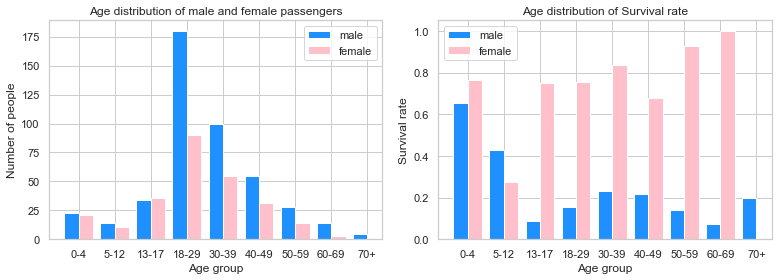

In [19]:
age_sex = data_train.groupby(['agegroup'])['Sex'].value_counts()

#age_sex[:,'male']
#age_sex[:,'female']

width=0.4
plt.subplots(1,2,sharey = False, tight_layout = True,figsize=(11, 4))

plt.subplot(121)
plt.bar(xnum-width/2,age_sex[:,'male'], width, color = 'dodgerblue')
plt.bar(xnum[0:8]+width/2,age_sex[:,'female'], width, color = 'pink')
plt.xlabel('Age group')
plt.ylabel('Number of people')
plt.xticks(xnum,['0-4','5-12','13-17','18-29','30-39','40-49','50-59','60-69','70+'])
plt.legend(['male','female'])
plt.title('Age distribution of male and female passengers')


plt.subplot(122)
sv_age_sex = data_train.groupby(['agegroup','Sex'])['Survived']
num_age_sex = sv_age_sex.count()
#num_age_sex

sv_num_age_sex = sv_age_sex.sum()
#sv_num_age_sex

sv_rate_age_sex = sv_age_sex.mean()
#sv_rate_age_sex
plt.bar(xnum-width/2,sv_rate_age_sex[:,'male'], width, color = 'dodgerblue')
plt.bar(xnum[0:8]+width/2,sv_rate_age_sex[:,'female'], width, color = 'pink')
plt.xlabel('Age group')
plt.ylabel('Survival rate')
plt.xticks(xnum,['0-4','5-12','13-17','18-29','30-39','40-49','50-59','60-69','70+'])
plt.legend(['male','female'])
plt.title('Age distribution of Survival rate')



### 5. Survival vs SibSp and Parch

Another more subtle factor to take into account is the number of siblines and parents/children.

In [20]:
print('Counts for number of SibSp:\n',data_train['SibSp'].value_counts())
print('Counts for number of Parch:\n',data_train['Parch'].value_counts())

Counts for number of SibSp:
 0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
Counts for number of Parch:
 0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [21]:
sv_sib= data_train.groupby('SibSp')['Survived'].mean()
sv_pch= data_train.groupby('Parch')['Survived'].mean()
print('survival rate vs number of siblings:\n',sv_sib)
print('survival rate vs number of parents/children:\n',sv_pch)

survival rate vs number of siblings:
 SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64
survival rate vs number of parents/children:
 Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64


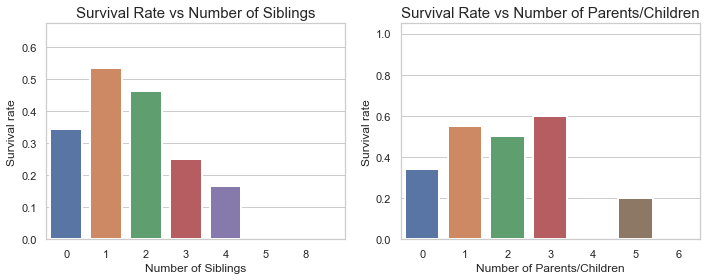

In [22]:
plt.figure

plt.subplots(1,2,sharey = False, tight_layout = True,figsize=(10, 4))

plt.subplot(121)
sns.barplot(x = "SibSp", 
            y = "Survived", 
            estimator = np.mean,   # another trick to calculate the survival rate, is to use mean() function, since survived = 1, nonsurvived = 0
            data=data_train, 
            #ax = pclass_bar,
            capsize = 0,
            errwidth = 0,
            linewidth = 2 )
plt.title("Survival Rate vs Number of Siblings",fontsize = 15)
plt.xlabel("Number of Siblings", fontsize = 12);
plt.ylabel("Survival rate", fontsize = 12);
labels = ['0', '1', '2','3','4','5','8']
#val = sorted(train.Pclass.unique())
val = [0,1,2,3,4,5,6,7] ## this is just a temporary trick to get the label right. 
plt.xticks(val,labels);

plt.subplot(122)
sns.barplot(x = "Parch", 
            y = "Survived", 
            estimator = np.mean,   # another trick to calculate the survival rate, is to use mean() function, since survived = 1, nonsurvived = 0
            data=data_train, 
            #ax = pclass_bar,
            capsize = 0,
            errwidth = 0,
            linewidth = 2 )
plt.title("Survival Rate vs Number of Parents/Children",fontsize = 15)
plt.xlabel("Number of Parents/Children", fontsize = 12);
plt.ylabel("Survival rate", fontsize = 12);
labels = ['0', '1', '2','3','4','5','6']
#val = sorted(train.Pclass.unique())
val = [0,1,2,3,4,5,6] ## this is just a temporary trick to get the label right. 
plt.xticks(val,labels);

We find that passengers with one or two siblings, or one to three parents/children have higher survival rates than passengers without siblings or parents/children. However, if the number of siblings is larger than 3 or the number of parents/children is larger than 4, the survival rate is significantly lower.

### Summary of statistic analysis


1. In the training data set, we found that only around 38% of the passengers survived in the Titanic accidence, while the rest 62% are dead.
2. Among the passengers, 74% of females survived, while only 19% of male survived. First class passengers have the highest survival rate (63%), followed by second class (47%) and third class (24%)
3. Children below the age of 5 have much higher survival rate (70%), in compared to other age group (below 40%)

These observations are consistent with the record, which showed that females and children were given the priority to getting onto the saving boat during the accident. 

##  Machine learning models to predict the survival rate

Below we use different types of machine learning models to predict the survival rate given certain parameters

There are several models we want to try: Bayes, K-NN, SVM, Decision Forrests, Logistic Regression, Deep Neural Network. We will use scikit-learn and pytorch libraries.

First, we need to prepare the dataset.
Among the 891 training samples, 177 of them do not have age information, similarly 86 out of 418 testing samples do not have age information. This takes up around 20% of the samples and we can't ignore them during training or testing. Rather, we should give a proper guess of the age. A coarse assumption is simply to fill the missing value with the mean value of 29. However, we can also use machine learning to have a more accurate estimation of the age based on other parameters.

From the correlation matrix, we find the age actually has certain correlation with the Pclass, SibSp, Parch.

### 1. Predicting unknown age information

We use the train data set with age information for training, and test the accuracy of the model using data from the test set. 

In [23]:

data_test['sex_num']=(data_test['Sex']=='male')*1-0.5 # convert gender to numeric, "male"=0.5, "female" = -0.5


# # normalize the fare distribution
maxfare = pd.merge(data_train[['Fare']],data_test[['Fare']]).max()
minfare = pd.merge(data_train[['Fare']],data_test[['Fare']]).min()

data_train['Fare_norm'] = (data_train[['Fare']]-minfare)/(maxfare - minfare)
data_test['Fare_norm'] =(data_test[['Fare']]-minfare)/(maxfare - minfare)
# list for training
lists = ['Pclass', 'SibSp', 'Parch','sex_num','Fare_norm','Age']

remove_list = ['Age']
dt_train = data_train[lists].dropna(how='any',axis=0)
dt_test = data_test[lists].dropna(how='any',axis=0)

# # normalize dataset
# from sklearn.preprocessing import MinMaxScaler
# # call MinMaxScaler object
# min_max_scaler = MinMaxScaler()
# # feed in a numpy array
# dt_train_norm = min_max_scaler.fit_transform(dt_train.values)

X_train_age = dt_train[[element for i, element in enumerate(lists) if element not in remove_list]]
X_test_age = dt_test[[element for i, element in enumerate(lists) if element not in remove_list]]
Y_train_age = dt_train[['Age']]
Y_test_age = dt_test[['Age']]



Since most regression model and classification model can be generalized using deep neural network, we use this approach to see if we can provide a reasonable estimation accuracy of the age.

In [24]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.nn.functional as F
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from torch import Tensor
torch.manual_seed(2)

we will build a simple deep neural network with 5 input channels, 1 output channels, 3 hidden layers

In [25]:
# Create the model class using Relu as the activation function
class NetRelu(nn.Module):
    
    # constructor
    def __init__(self,D_in, H1, H2, H3, D_out):
        super(NetRelu,self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1,H2)
        self.linear3 = nn.Linear(H2,H3)
        self.linear4 = nn.Linear(H3,D_out)
        
    def forward(self,x):
        x = torch.relu(self.linear1(x))
        x = torch.relu(self.linear2(x))
        x = torch.relu(self.linear3(x))
        x = self.linear4(x)
        
        return x

In [26]:
# Create the model class using Relu as the activation function
class NetTanh(nn.Module):
    
    # constructor
    def __init__(self,D_in, H1, H2, H3, D_out):
        super(NetTanh,self).__init__()
        self.linear1 = nn.Linear(D_in, H1)
        self.linear2 = nn.Linear(H1,H2)
        self.linear3 = nn.Linear(H2,H3)
        self.linear4 = nn.Linear(H3,D_out)
        
    def forward(self,x):
        x = torch.tanh(self.linear1(x))
        x = torch.tanh(self.linear2(x))
        x = torch.tanh(self.linear3(x))
        x = self.linear4(x)
        
        return x

In [27]:
# Define the class for neural network model with He Initialization

class Net_He(nn.Module):
    
    # Constructor
    def __init__(self, Layers):
        super(Net_He, self).__init__()
        self.hidden = nn.ModuleList()

        for input_size, output_size in zip(Layers, Layers[1:]):
            linear = nn.Linear(input_size, output_size)
            torch.nn.init.kaiming_uniform_(linear.weight, nonlinearity='relu')
            self.hidden.append(linear)

    # 
    def forward(self, x):
        L = len(self.hidden)
        for (l, linear_transform) in zip(range(L), self.hidden):
            if l < L - 1:
                x = F.relu(linear_transform(x))
            else:
                x = linear_transform(x)
        return x

In [71]:
# define criterion, optimizer, train_loader and validation_loader

# Entropy loss
def criterion_cel(outputs, labels):
    out = -1 * torch.mean(labels * torch.log(outputs) + (1 - labels) * torch.log(1 - outputs))
    return out

# relative square error
def criterion_mse(outputs, labels):
    out = torch.sqrt(torch.mean(abs((outputs - labels)/labels)**2))
    return out



In [74]:
# Train the model

def train(model, criterion, train_loader, test_loader, optimizer, epochs):
   
    
    # create a dictionary for the loss 
    loss_acc = {'train_loss':[], 'test_loss':[],'train_acc':[], 'test_acc':[]}
    
    i = 0
        
    for epoch in range(epochs):
        for i, (x,y) in enumerate(train_loader):
            optimizer.zero_grad()
            yhat = model(x)
            loss = criterion(yhat, y)
            loss.backward()
            optimizer.step()
            loss_acc['train_loss'].append(loss)
        
        correct = 0
        for x,y in test_loader:
            yhat = model(x)
            loss = criterion(yhat, y)
            loss_acc['test_loss'].append(loss)
            
            # we define a 'correct' estimation if the predicted age has a relative error of abs(yhat - y)/y<= 0.25
            correct+= (abs((y-yhat)/y)<=0.25).sum().item()
            
        acc = correct/len(test_dataset)
        
        loss_acc['test_acc'].append(acc)
            
    return loss_acc

In [75]:
# to use dataloader of minibatch, we need to combine the features and outputs in a nested format like train_dataset[0] = [[feature][0], output[0]]
train_dataset = TensorDataset(Tensor(X_train_age.values),Tensor(Y_train_age.values))
test_dataset = TensorDataset(Tensor(X_test_age.values),Tensor(Y_test_age.values))

train_loader = DataLoader(dataset=train_dataset, batch_size=len(train_dataset), shuffle=False)
test_loader = DataLoader(dataset=test_dataset, batch_size=len(test_dataset), shuffle=False)



In [78]:
input_dim = 5
h1_dim = 10
h2_dim = 10
h3_dim = 5
output_dim = 1
momentum = 0.9


layers = [input_dim, h1_dim, h2_dim, h3_dim, output_dim]

learning_rate = 0.015
cust_epochs = 1000

model_relu = NetRelu(input_dim, h1_dim, h2_dim,h3_dim,output_dim)
optimizer_relu = torch.optim.SGD(model_relu .parameters(), lr=learning_rate, momentum=momentum)
training_results_relu = train(model_relu, criterion_mse, train_loader, test_loader, optimizer_relu, epochs=cust_epochs)

model_tanh = NetTanh(input_dim, h1_dim, h2_dim,h3_dim,output_dim)
optimizer_tanh = torch.optim.SGD(model_tanh .parameters(), lr=learning_rate, momentum=momentum)
training_results_tanh = train(model_tanh, criterion_mse, train_loader, test_loader, optimizer_tanh, epochs=cust_epochs)


model_He = Net_He(layers)
optimizer_He = torch.optim.SGD(model_He.parameters(), lr=learning_rate, momentum=momentum)
training_results_He = train(model_He, criterion_mse, train_loader, test_loader, optimizer_He, epochs=cust_epochs)


<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

(<Figure size 576x288 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000001820F7F0>,
       dtype=object))

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'test_loss_RMS')

Text(0.5, 0, 'epochs')

Text(0, 0.5, 'math +/-5 year accuracy')

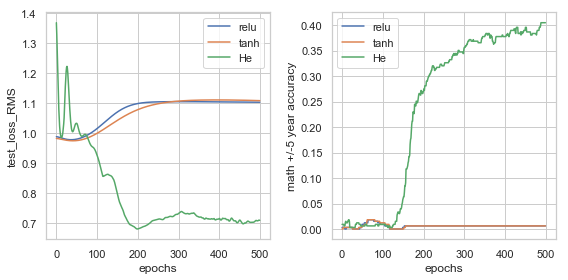

In [77]:
plt.figure
plt.subplots(1,2,sharey = False, tight_layout = True,figsize=(8, 4))

plt.subplot(1,2,1)
#plt.plot((training_results_relu['train_loss']))
plt.plot((training_results_relu['test_loss']))
#plt.plot((training_results_tanh['train_loss']))
plt.plot((training_results_tanh['test_loss']))
#plt.plot((training_results_He['train_loss']))
plt.plot((training_results_He['test_loss']))

plt.legend(['relu','tanh','He'])
plt.xlabel('epochs')
plt.ylabel('test_loss_RMS')

plt.subplot(1,2,2)
plt.plot((training_results_relu['test_acc']))
plt.plot((training_results_tanh['test_acc']))
plt.plot((training_results_He['test_acc']))
plt.legend(['relu','tanh','He'])
plt.xlabel('epochs')
plt.ylabel('25% relative error age accuracy')

The +/- 5 year accuracy is around 35% using relu function or He initialization method. Incomparison,if we use the mean age, the +/- 5 year accuracy will be only around 20%

In [33]:
acc_ave = (abs((data_test['Age']-data_test['Age'].mean())/data_test['Age'])<=5).sum().item()/len(data_test['Age'])
print('+/- 5 year accuracy using only mean age:',acc_ave)

+/- 5 year accuracy using only mean age: 0.20334928229665072


In [34]:
lists = ['Pclass', 'SibSp', 'Parch','sex_num','Fare_norm','Age']
remove_list = ['Age']

dt_train_agefill = data_train[lists]
dt_test_agefill = data_test[lists]

X_train_agefill = dt_train_agefill[[element for i, element in enumerate(lists) if element not in remove_list]]
X_test_agefill = dt_test_agefill[[element for i, element in enumerate(lists) if element not in remove_list]]
Y_train_agefill = dt_train_agefill[['Age']]
Y_test_agefill = dt_test_agefill[['Age']]

X_train_agefill.iloc[0]

Pclass       3.000000
SibSp        1.000000
Parch        0.000000
sex_num      0.500000
Fare_norm    0.014151
Name: 0, dtype: float64

In [35]:
# predicted age using relu function

# convert dataframe to tensor of dtype = torch.float32
x = torch.tensor(X_train_agefill.values,dtype=torch.float32)

yhat = model_relu(x)

yhat_pred = yhat.numpy()
yhat_pred = pd.Dataframe(yhat_pred)

<function Tensor.numpy>

In [62]:
yhat_pred = yhat.detach().numpy()
yhat_pred0 = pd.DataFrame(yhat_pred)
Y_train_agefill['Age_pred'] = yhat_pred0

Y_train_agefill['error_relative'] = (Y_train_agefill['Age_pred'] - Y_train_agefill['Age'])/Y_train_agefill['Age']

<function matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)>

(-100, 100)

Text(0.5, 1.0, 'Distribution of relative error vs age ')

Text(0, 0.5, 'Relative error %')

Text(0.5, 0, 'Age')

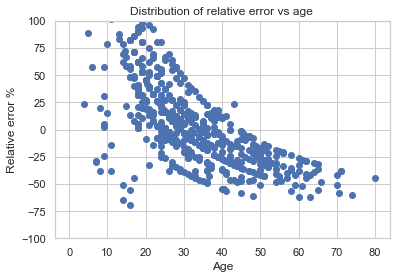

In [70]:
plt.figure
plt.scatter(Y_train_agefill['Age'],100*Y_train_agefill['error_relative'])
plt.ylim(-100,100)
plt.title('Distribution of relative error vs age ')
plt.ylabel('Relative error %')
plt.xlabel('Age')